# Painter by Numbers: 

Contamos con un archivo llamado **all_data_info** el cual 
cuenta con los siguientes campos:

* artist: Nombre del Artista.
* date: Año de cuando la pintura fue creada(si esta disponible).
* genre: Género informacion proporcionada por WikiArt.
* pixelsx,pixelsy: Dimensiones de la imagen.
* size_bytes: Tamaño de la imagen en bytes.
* source: El origen de la imagen WikiArt o Wikipedia.
* style: Información del estilo obtenido de WikiArt.
* title: El titulo de la pintura.
* in_train: Te dice si la imagen esta en el conjunto de entrenamiento.
* new_filename: Un identificador que se la asigna al archivo.

In [9]:
# Cargamos el archivo que se menciono anteriormente. 
import re
import math
import pandas as pd 
import matplotlib.pyplot as plt    
import numpy as np

df = pd.read_csv("all_data_info.csv")
print df.head(5)

           artist    date     genre  pixelsx  pixelsy  size_bytes   source  \
0  Barnett Newman  1955.0  abstract  15530.0   6911.0   9201912.0  wikiart   
1  Barnett Newman  1950.0  abstract  14559.0   6866.0   8867532.0  wikiart   
2     kiri nichol  2013.0       NaN   9003.0   9004.0   1756681.0      NaN   
3     kiri nichol  2013.0       NaN   9003.0   9004.0   1942046.0      NaN   
4     kiri nichol  2013.0       NaN   9003.0   9004.0   1526212.0      NaN   

                  style                  title artist_group in_train  \
0  Color Field Painting                  Uriel   train_only     True   
1  Color Field Painting  Vir Heroicus Sublimis   train_only     True   
2         Neoplasticism                    NaN    test_only    False   
3         Neoplasticism                    NaN    test_only    False   
4         Neoplasticism                    NaN    test_only    False   

  new_filename  
0   102257.jpg  
1    75232.jpg  
2    32145.jpg  
3    20304.jpg  
4      836.jp

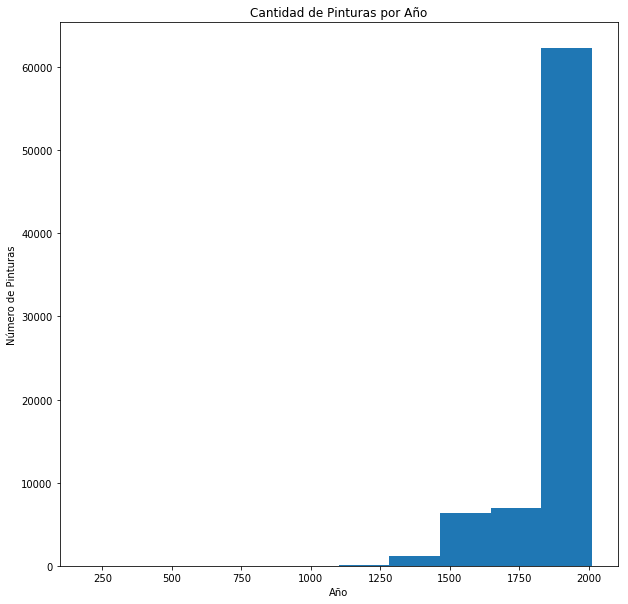

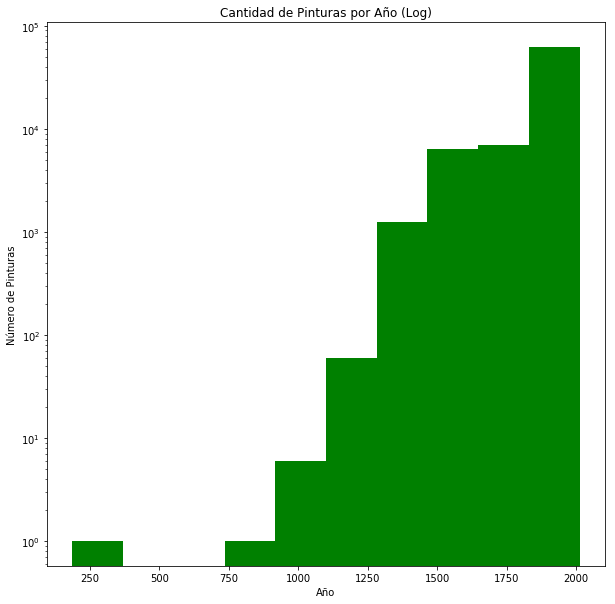

In [11]:
valid_date=[]
for val in df[pd.notnull(df['date'])]['date']:
    pr=re.findall('\d+\.?', val)
    if pr!=[]:
        valid_date.append(int(float(pr[0])))
    else:
        continue

#Pasamos la lista a a un vector de numpy.
valid_date = np.array(valid_date)

#
fig,ax = plt.subplots()
ax.set_xlabel(u'Año')
ax.set_ylabel(u'Número de Pinturas')
ax.set_title(u'Cantidad de Pinturas por Año')
plt.hist(valid_date, log=False)
plt.show()

fig,ax = plt.subplots()
ax.set_xlabel(u'Año')
ax.set_ylabel(u'Número de Pinturas')
ax.set_title(u'Cantidad de Pinturas por Año (Log)')
plt.hist(valid_date, log=True,color='g')
plt.show()


===Conteo en base al estilo de la obra de arte===
Impressionism                   10643
Realism                         10523
Romanticism                      9285
Expressionism                    7013
Post-Impressionism               5778
Art Nouveau (Modern)             4899
Baroque                          4400
Surrealism                       4167
Symbolism                        3476
Rococo                           2733
Northern Renaissance             2379
Naïve Art (Primitivism)          2295
Abstract Expressionism           2074
Neoclassicism                    2038
Cubism                           1747
Ukiyo-e                          1426
Early Renaissance                1351
Mannerism (Late Renaissance)     1342
High Renaissance                 1314
Art Informel                     1267
Name: style, dtype: int64


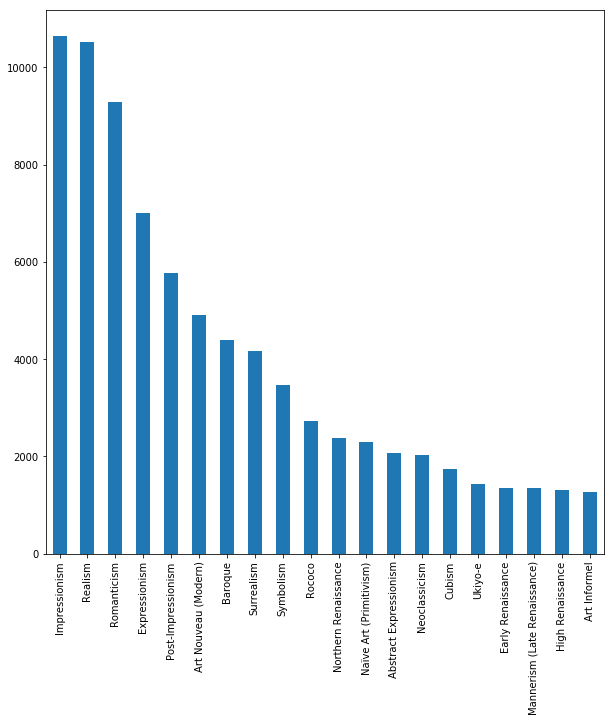

In [7]:
print ("===Conteo en base al estilo de la obra de arte===")
print (df['style'].value_counts())[:20]
((df['style'].value_counts())[:20]).plot(kind='bar')
plt.show()

===Cantidad de obras por artista===
Pierre-Auguste Renoir         500
Ivan Aivazovsky               500
Zdislav Beksinski             500
Pablo Picasso                 500
Gustave Dore                  500
Rembrandt                     500
Ivan Shishkin                 500
Giovanni Battista Piranesi    500
John Singer Sargent           500
Albrecht Durer                500
Marc Chagall                  500
Ilya Repin                    500
Pyotr Konchalovsky            499
Paul Cezanne                  499
Camille Pissarro              499
Martiros Saryan               499
Paul Gauguin                  498
Boris Kustodiev               498
Claude Monet                  498
Raphael Kirchner              497
Name: artist, dtype: int64


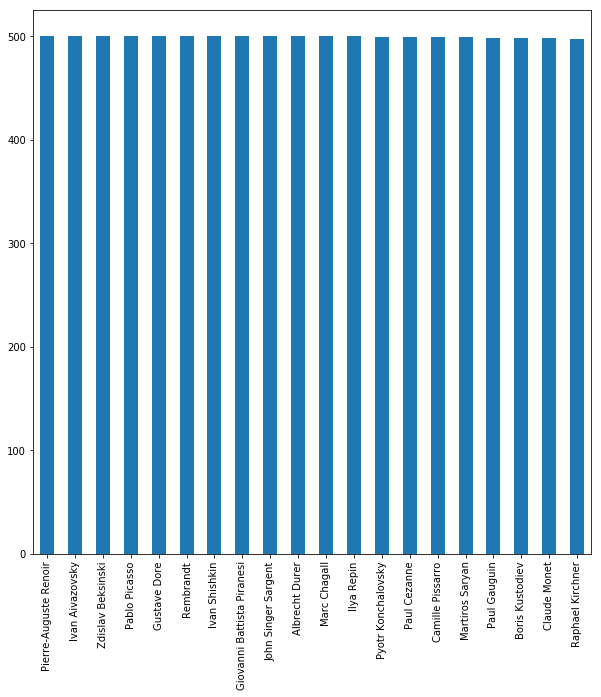

In [12]:
print ("===Cantidad de obras por artista===")
print (df['artist'].value_counts())[:20]
((df['artist'].value_counts())[:20]).plot(kind='bar')
plt.show()

In [4]:
(df['size_bytes'].astype(int)/1000000).describe()

count    103250.000000
mean          0.388324
std           0.878478
min           0.003516
25%           0.094386
50%           0.167670
75%           0.340128
max          32.443139
Name: size_bytes, dtype: float64

==El total de imagenes en Train1==
11024


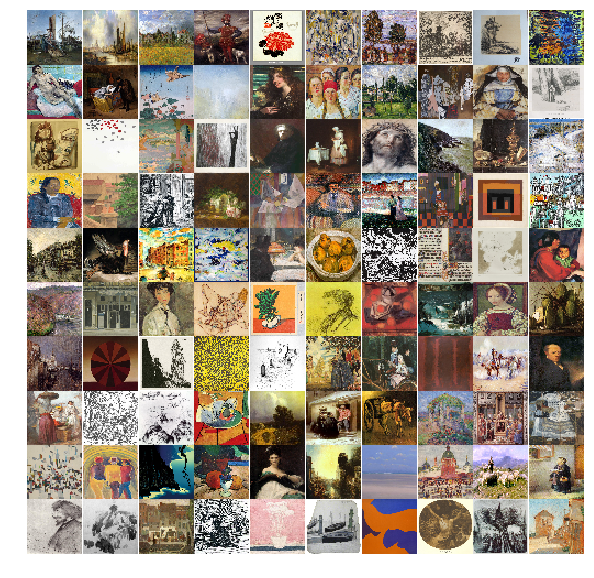

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageFilter
import random
import cv2
import os, glob


train1_images = [f for f in glob.glob("/home/nemis/Proyecto_Aprendizaje/train_1/*")]
print ("==El total de imagenes en Train1==")
print (len(train1_images))

i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in train1_images[:100]:
    im = cv2.imread(l)
    im = cv2.resize(im, (50, 50)) 
    plt.subplot(10, 10, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1
fig.savefig('ejemplo_imagenes.png')  
plt.show()

In [17]:
#Definimos un diccionario el cual tiene como llave el nombre del archivo y 
# como valor asociado tiene el nombre del artista al que pertenece. 
import pickle
dict_artist_file = pd.Series(df.artist.values,index=df.new_filename).to_dict()
pickle.dump( dict_artist_file, open( "dict_artist_file", "wb" ) )